In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_path = r"C:\Users\91832\Downloads\internet firewall.csv"
df = pd.read_csv(dataset_path)
df.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


## Target 

Absolute Frequencies:
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

Percentages:
allow         0.574376
deny          0.228697
drop          0.196103
reset-both    0.000824
Name: Action, dtype: float64


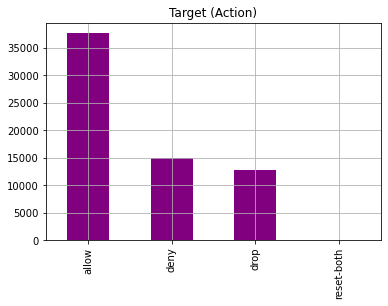

In [5]:
print('Absolute Frequencies:')
print(df.Action.value_counts())
print()

print('Percentages:')
print(df.Action.value_counts(normalize=True))

df.Action.value_counts().plot(kind='bar', color='purple')
plt.title('Target (Action)')
plt.grid()
plt.show()

## Features

Feature: Source Port
58638    840
27005    513
443      273
57470    222
49418    210
6881     177
0        173
50584    116
3478     105
26900    102
Name: Source Port, dtype: int64



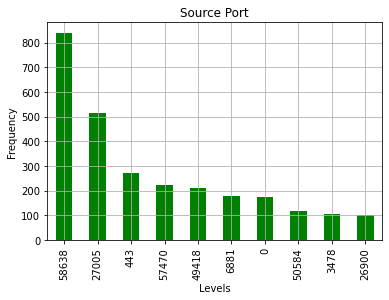

Feature: Destination Port
53       15414
445      12891
443      11684
80        4035
25174     1087
5900       909
37965      826
22114      767
64147      756
50584      717
Name: Destination Port, dtype: int64



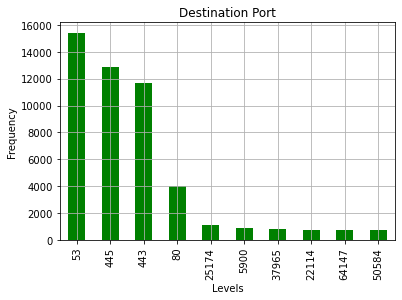

Feature: NAT Source Port
0        28432
48817       83
58638       51
50116       15
7986         5
60868        5
30399        5
57596        5
57880        5
43757        5
Name: NAT Source Port, dtype: int64



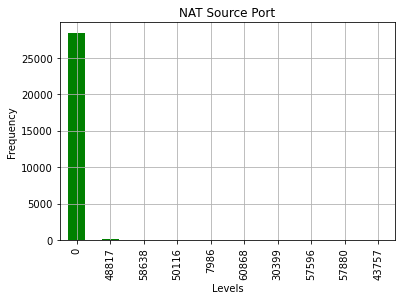

Feature: NAT Destination Port
0        28432
53       15094
443      11678
80        4028
27015      234
27017      160
123        156
3389       156
6881       143
5228       100
Name: NAT Destination Port, dtype: int64



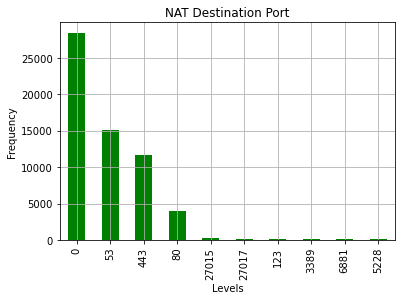

In [6]:
features_cat = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']
# Define the desired color for the bar graph
bar_color = 'green'

for feature in features_cat:
    print('Feature:', feature)
    feature_counts = df[feature].value_counts().head(10)  
    print(feature_counts)
    print()
    feature_counts.plot(kind='bar', color=bar_color)  
    plt.title(feature)
    plt.xlabel('Levels')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

## Target vs Feature

Feature:Source Port - Top 10 levels only


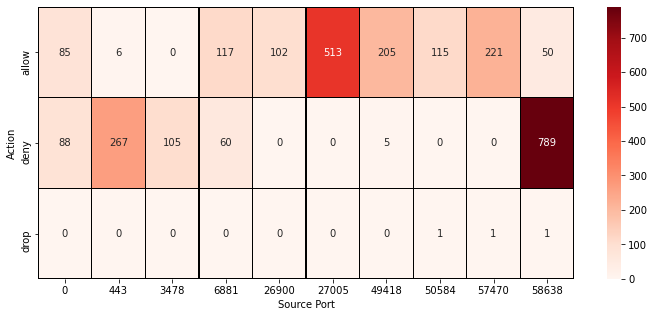

Feature:Destination Port - Top 10 levels only


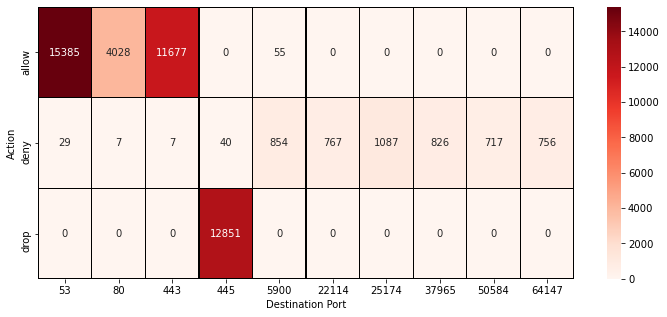

Feature:NAT Source Port - Top 10 levels only


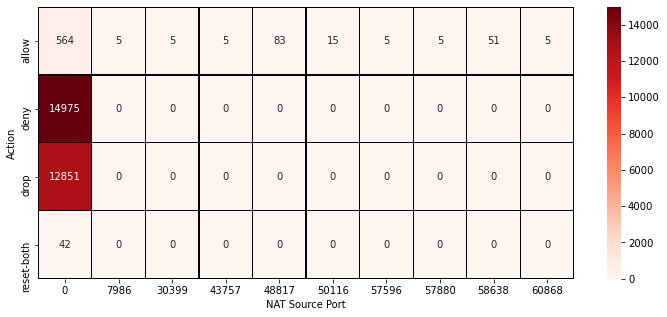

Feature:NAT Destination Port - Top 10 levels only


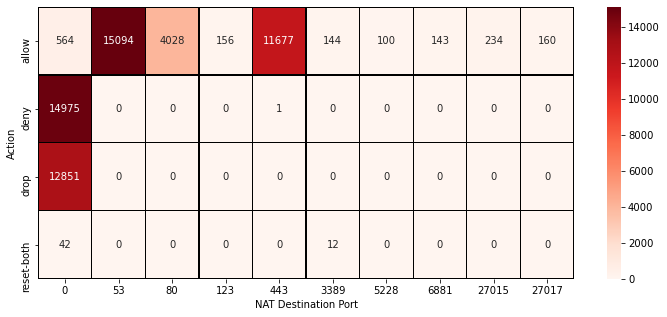

In [7]:
# visualising the crosstable Target vs Feature (Top 10 levels only)
for f in features_cat:
    top10_levels = df[f].value_counts()[0:10].index.to_list()
    df_temp = df[df[f].isin(top10_levels)]
    ctab = pd.crosstab(df_temp.Action, df_temp[f])
    print('Feature:' + f + ' - Top 10 levels only')
    plt.figure(figsize=(12,5))
    sns.heatmap(ctab, annot=True, fmt='d', 
                cmap='Reds',
                linecolor='black',
                linewidths=0.2)
    plt.show()

## Classification Techniques

In [8]:
# Load the dataset
dataset_path = r"C:\Users\91832\Downloads\internet firewall.csv"
data = pd.read_csv(dataset_path)
data.head()
# Separate features (X) and labels (y)
X = data.drop('Action', axis=1)
y = data['Action']

C:\Users\91832\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


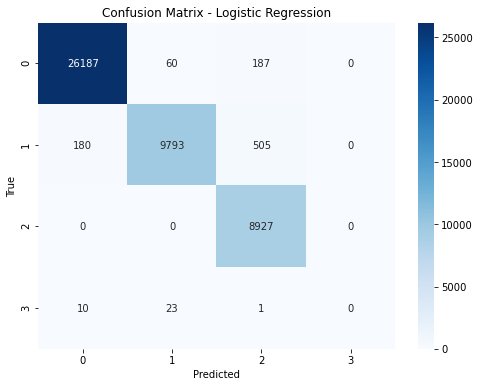

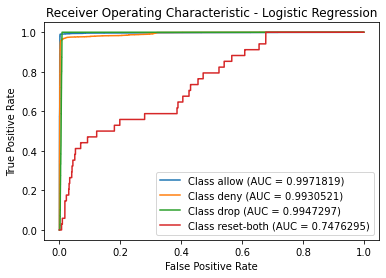

Logistic Regression Accuracy: 0.9789418612255575
Logistic Regression Confusion Matrix:
[[26187    60   187     0]
 [  180  9793   505     0]
 [    0     0  8927     0]
 [   10    23     1     0]]
Average Logistic Regresssion Accuracy: 0.9331483229772268


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=70)
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

lr_probabilities = lr_model.predict_proba(X_test)

# Convert the labels to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
lr_fpr = dict()
lr_tpr = dict()
lr_roc_auc = dict()
for i in range(n_classes):
    lr_fpr[i], lr_tpr[i], _ = roc_curve(y_test_bin[:, i], lr_probabilities[:, i])
    lr_roc_auc[i] = roc_auc_score(y_test_bin[:, i], lr_probabilities[:, i])

# Compute the average ROC AUC
lr_roc_auc_avg = np.mean(list(lr_roc_auc.values()))

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(lr_fpr[i], lr_tpr[i], label='Class %s (AUC = %0.7f)' % (np.unique(y)[i], lr_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:")
print(lr_confusion_matrix)
print("Average Logistic Regresssion Accuracy:",lr_roc_auc_avg)

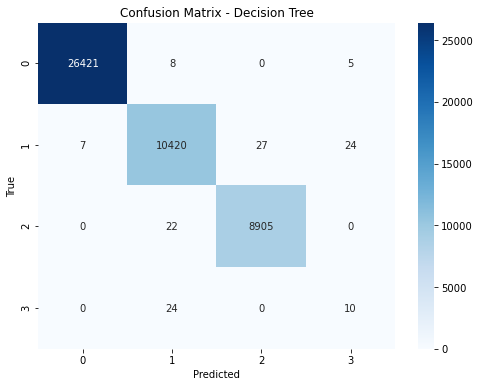

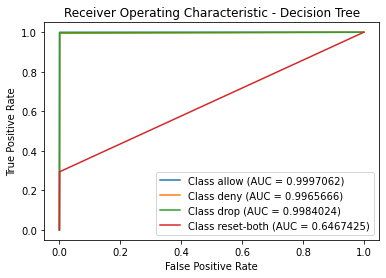

Decision Tree Accuracy: 0.9974494800863253
Decision Tree Confusion Matrix:
[[26421     8     0     5]
 [    7 10420    27    24]
 [    0    22  8905     0]
 [    0    24     0    10]]
Average Decision Tree Accuracy: 0.9103544140757112


In [11]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_probabilities = dt_model.predict_proba(X_test)
# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
dt_fpr = dict()
dt_tpr = dict()
dt_roc_auc = dict()
for i in range(n_classes):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_bin[:, i], dt_probabilities[:, i])
    dt_roc_auc[i] = roc_auc_score(y_test_bin[:, i], dt_probabilities[:, i])


# Compute the average ROC AUC
dt_roc_auc_avg = np.mean(list(dt_roc_auc.values()))

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(dt_fpr[i], dt_tpr[i], label='Class %s (AUC = %0.7f)' % (np.unique(y)[i], dt_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc='lower right')
plt.show()

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)
print("Average Decision Tree Accuracy:",dt_roc_auc_avg)

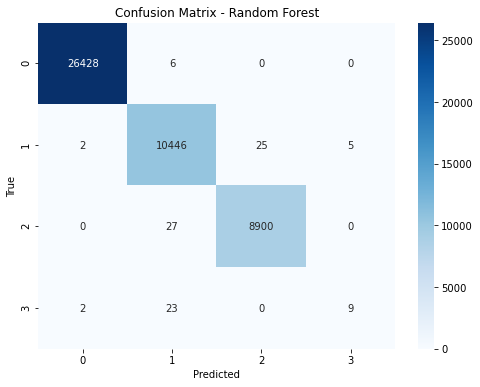

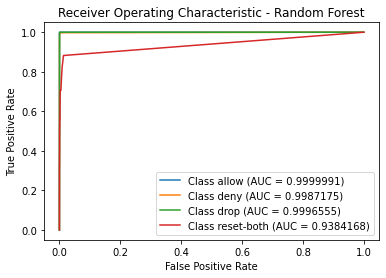

Random Forest Accuracy: 0.9980380616048656
Random Forest Confusion Matrix:
[[26428     6     0     0]
 [    2 10446    25     5]
 [    0    27  8900     0]
 [    2    23     0     9]]
Random Forest Average ROC AUC: 0.9841972359569457


In [12]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

rf_probabilities = rf_model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
rf_fpr = dict()
rf_tpr = dict()
rf_roc_auc = dict()
for i in range(n_classes):
    rf_fpr[i], rf_tpr[i], _ = roc_curve(y_test_bin[:, i], rf_probabilities[:, i])
    rf_roc_auc[i] = roc_auc_score(y_test_bin[:, i], rf_probabilities[:, i])

# Compute average ROC AUC
rf_roc_auc_avg = np.mean(list(rf_roc_auc.values()))

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(rf_fpr[i], rf_tpr[i], label='Class %s (AUC = %0.7f)' % (np.unique(y)[i], rf_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)
print("Random Forest Average ROC AUC:", rf_roc_auc_avg)

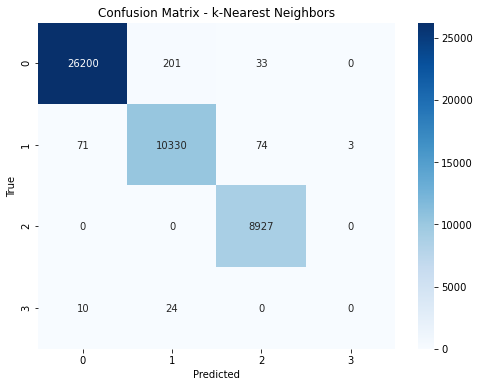

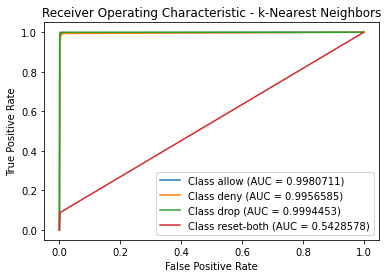

k-Nearest Neighbors Accuracy: 0.9909314847513788
k-Nearest Neighbors Confusion Matrix:
[[26200   201    33     0]
 [   71 10330    74     3]
 [    0     0  8927     0]
 [   10    24     0     0]]
k-Nearest Neighbors Average ROC AUC: 0.884008166462976


In [13]:
# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - k-Nearest Neighbors')
plt.show()

knn_probabilities = knn_model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
knn_fpr = dict()
knn_tpr = dict()
knn_roc_auc = dict()
for i in range(n_classes):
    knn_fpr[i], knn_tpr[i], _ = roc_curve(y_test_bin[:, i], knn_probabilities[:, i])
    knn_roc_auc[i] = roc_auc_score(y_test_bin[:, i], knn_probabilities[:, i])

# Compute average ROC AUC
knn_roc_auc_avg = np.mean(list(knn_roc_auc.values()))

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(knn_fpr[i], knn_tpr[i], label='Class %s (AUC = %0.7f)' % (np.unique(y)[i], knn_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

print("k-Nearest Neighbors Accuracy:", knn_accuracy)
print("k-Nearest Neighbors Confusion Matrix:")
print(knn_confusion_matrix)
print("k-Nearest Neighbors Average ROC AUC:", knn_roc_auc_avg)

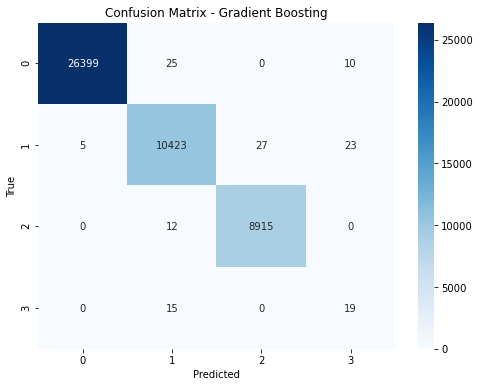

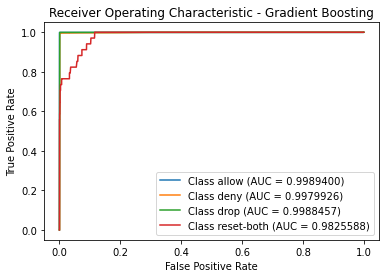

Gradient Boosting Accuracy: 0.9974494800863253
Gradient Boosting Confusion Matrix:
[[26399    25     0    10]
 [    5 10423    27    23]
 [    0    12  8915     0]
 [    0    15     0    19]]
Gradient Boosting Average ROC AUC: 0.9945842781348146


In [15]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)
#Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

gb_probabilities = gb_model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
gb_fpr = dict()
gb_tpr = dict()
gb_roc_auc = dict()
for i in range(n_classes):
    gb_fpr[i],gb_tpr[i], _ = roc_curve(y_test_bin[:, i], gb_probabilities[:, i])
    gb_roc_auc[i] = roc_auc_score(y_test_bin[:, i], gb_probabilities[:, i])

# Compute average ROC AUC
gb_roc_auc_avg = np.mean(list(gb_roc_auc.values()))

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(gb_fpr[i], gb_tpr[i], label='Class %s (AUC = %0.7f)' % (np.unique(y)[i], gb_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Confusion Matrix:")
print(gb_confusion_matrix)
print("Gradient Boosting Average ROC AUC:", gb_roc_auc_avg)

C:\Users\91832\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Average Accuracy: 0.993


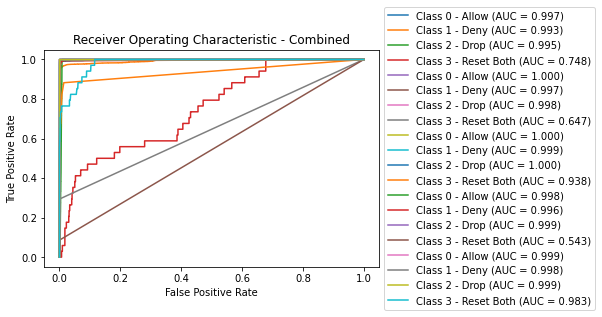

In [16]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_probabilities = lr_model.predict_proba(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_probabilities = dt_model.predict_proba(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_probabilities = rf_model.predict_proba(X_test)

# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_probabilities = knn_model.predict_proba(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_probabilities = gb_model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curves and AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()

# Logistic Regression
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], lr_probabilities[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], lr_probabilities[:, i])

# Decision Tree
for i in range(n_classes):
    fpr[i + n_classes], tpr[i + n_classes], _ = roc_curve(y_test_bin[:, i], dt_probabilities[:, i])
    roc_auc[i + n_classes] = roc_auc_score(y_test_bin[:, i], dt_probabilities[:, i])

# Random Forest
for i in range(n_classes):
    fpr[i + 2 * n_classes], tpr[i + 2 * n_classes], _ = roc_curve(y_test_bin[:, i], rf_probabilities[:, i])
    roc_auc[i + 2 * n_classes] = roc_auc_score(y_test_bin[:, i], rf_probabilities[:, i])

# KNN
for i in range(n_classes):
    fpr[i + 3 * n_classes], tpr[i + 3 * n_classes], _ = roc_curve(y_test_bin[:, i], knn_probabilities[:, i])
    roc_auc[i + 3 * n_classes] = roc_auc_score(y_test_bin[:, i], knn_probabilities[:, i])

# Gradient Boosting
for i in range(n_classes):
    fpr[i + 4 * n_classes], tpr[i + 4 * n_classes], _ = roc_curve(y_test_bin[:, i], gb_probabilities[:, i])
    roc_auc[i + 4 * n_classes] = roc_auc_score(y_test_bin[:, i], gb_probabilities[:, i])

# Define the class labels
class_labels = ['Allow', 'Deny', 'Drop', 'Reset Both']

# Calculate average accuracy
average_accuracy = (lr_accuracy + dt_accuracy + rf_accuracy + knn_accuracy + gb_accuracy) / 5

# Print average accuracy
print("Average Accuracy: {:.3f}".format(average_accuracy))

# Plot the combined ROC curve
plt.figure()
for i in range(n_classes * 5):
    class_index = i % n_classes
    plt.plot(fpr[i], tpr[i], label='Class %s - %s (AUC = %0.3f)' % (class_index, class_labels[class_index], roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Combined')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
